In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim.models import Word2Vec
%matplotlib inline 


In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
customers=df['CustomerID'].unique().tolist()
len(customers)

4372

In [7]:
df['StockCode']=df['StockCode'].astype(str)

In [8]:
type(df['StockCode'][0])

str

In [9]:
customers[0]

17850.0

In [10]:
import random

In [11]:
random.shuffle(customers)

In [12]:
#Training set of customers ID
customers_train=[customers[i] for i in range(round(0.9*len(customers)))]

In [13]:
customers_train

[15985.0,
 15264.0,
 17531.0,
 14665.0,
 15819.0,
 14395.0,
 12516.0,
 14388.0,
 16224.0,
 16091.0,
 16531.0,
 16147.0,
 16807.0,
 14251.0,
 13187.0,
 13347.0,
 14300.0,
 13365.0,
 14135.0,
 16574.0,
 15597.0,
 13639.0,
 12718.0,
 17966.0,
 12736.0,
 15211.0,
 15720.0,
 15775.0,
 17844.0,
 17069.0,
 16422.0,
 12897.0,
 14584.0,
 14853.0,
 15089.0,
 14079.0,
 12426.0,
 14130.0,
 15286.0,
 16609.0,
 14152.0,
 13240.0,
 14960.0,
 16494.0,
 12723.0,
 15047.0,
 17733.0,
 13279.0,
 13170.0,
 16473.0,
 16999.0,
 18257.0,
 18072.0,
 12493.0,
 14105.0,
 18161.0,
 14765.0,
 15732.0,
 15002.0,
 14261.0,
 16059.0,
 16385.0,
 17314.0,
 12977.0,
 17703.0,
 12617.0,
 16297.0,
 13950.0,
 16353.0,
 17331.0,
 13607.0,
 18042.0,
 15032.0,
 14883.0,
 14149.0,
 13425.0,
 15602.0,
 15724.0,
 18150.0,
 16938.0,
 15539.0,
 15483.0,
 17117.0,
 13810.0,
 13821.0,
 15046.0,
 14792.0,
 13990.0,
 13689.0,
 12593.0,
 16950.0,
 15671.0,
 17503.0,
 14083.0,
 16913.0,
 13479.0,
 16041.0,
 12915.0,
 14528.0,
 15953.0,


In [14]:
train_df=df[df['CustomerID'].isin(customers_train)]
validation_df=df[~df['CustomerID'].isin(customers_train)]

In [15]:
train_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
#list to capture purchase data of training customers lists
purchases_train=[]

#populate the list with the product codes
for i in tqdm(customers_train):
    temp=train_df[train_df['CustomerID']==i]['StockCode'].tolist()
    purchases_train.append(temp)

100%|█████████████████████████████████████████████████████████████████████████████| 3935/3935 [00:04<00:00, 891.98it/s]


In [19]:
purchases_train[0]

['21080',
 '22844',
 '22700',
 '22702',
 '21165',
 '22477',
 '22918',
 '22921',
 '22920',
 '22917',
 '22916',
 '22919',
 '21894',
 '85053',
 '20914',
 '20752',
 '20754',
 '22558',
 '22567',
 '82578',
 '82580',
 '21609',
 '21868',
 '21900',
 '21899',
 '22082',
 '22081',
 '82580',
 '22652',
 '22845',
 '22844',
 '22702',
 '21165',
 '22918',
 '22920',
 '22917',
 '22916',
 '22919']

In [20]:
#Do the same for the validation set
purchases_val=[]
for i in tqdm(validation_df['CustomerID'].unique()):
       temp=validation_df[validation_df['CustomerID']==i]['StockCode'].tolist()
       purchases_val.append(temp)


100%|██████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 1102.30it/s]


In [190]:
model=Word2Vec(window=20,sg=1,hs=0,negative=10,alpha=0.03,seed=14)

In [191]:
model.build_vocab(purchases_train,progress_per=200)
model.train(purchases_train,total_examples=model.corpus_count,epochs=10,report_delay=1)

(3617502, 3654150)

In [192]:
model.init_sims(replace=True)

In [193]:
len(model.wv.vocab)

3171

In [194]:
X=model[model.wv.vocab]
X.shape

<ipython-input-194-21ff36f89bfb>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X=model[model.wv.vocab]


(3171, 100)

In [178]:
X

array([[ 0.00629864, -0.03219835, -0.0176961 , ...,  0.10097575,
         0.07547048, -0.03482274],
       [ 0.00738006, -0.11276327,  0.02454779, ...,  0.01844626,
        -0.07938263, -0.05841922],
       [-0.00185266, -0.12090704, -0.21097054, ...,  0.14222233,
         0.10548777, -0.16804706],
       ...,
       [-0.03217805, -0.13217697, -0.19826494, ...,  0.01941008,
         0.04162703, -0.16913861],
       [ 0.06903309, -0.22197638, -0.03579739, ...,  0.06228576,
         0.10945897, -0.10262724],
       [-0.18739004, -0.17642935, -0.09641673, ...,  0.07058515,
         0.05618258, -0.03847671]], dtype=float32)

In [196]:
model['16161G']

<ipython-input-196-3dbaa7240d96>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['16161G']


array([-0.20098715, -0.07041416, -0.15035112, -0.05933109, -0.18883263,
        0.00118096,  0.03788155, -0.1031899 ,  0.07976139, -0.03413735,
        0.10833112,  0.00592163, -0.14817192,  0.05266103, -0.22795534,
        0.03694838,  0.05732239, -0.07164954,  0.04990435, -0.1005071 ,
       -0.12546904,  0.05725343, -0.06101857, -0.0141144 ,  0.05090998,
        0.16758   ,  0.12234525,  0.04633383,  0.11373153, -0.02899604,
        0.10203423, -0.10227351, -0.1467421 , -0.076754  ,  0.09107988,
       -0.02948332, -0.13474306,  0.20393384,  0.07076596,  0.12868795,
        0.17494063, -0.07701544, -0.10846466, -0.02491026, -0.11471629,
       -0.04525547, -0.00775554,  0.02669188,  0.10743297, -0.01730386,
       -0.06011274,  0.07666048,  0.03620151, -0.04933418, -0.00960987,
        0.0053823 , -0.08446661, -0.12774715,  0.16528901,  0.10961249,
        0.01522717, -0.10756119,  0.17816229,  0.1496749 ,  0.13633552,
       -0.00171907, -0.03793868,  0.00198984,  0.169257  , -0.11

In [114]:
from umap import umap_

In [197]:
cluster_embedding = umap_.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

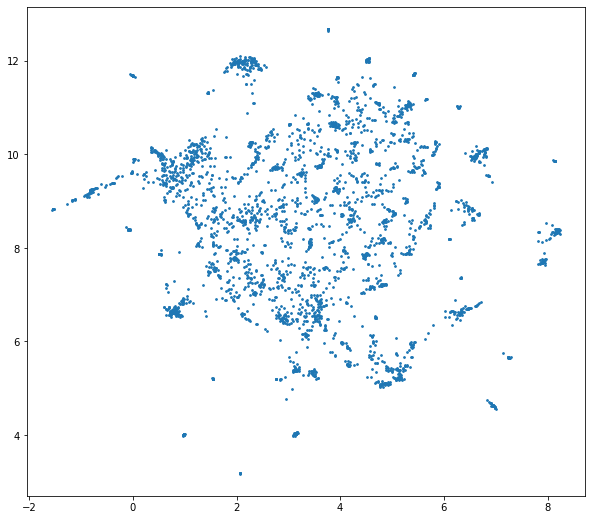

In [198]:
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [199]:
keys=model.wv.vocab.keys()
products[~products['StockCode'].isin(keys)]

,StockCode,Description
107,84854,GIRLY PINK TOOL SET
902,21895,POTTING SHED SOW 'N' GROW SET
1985,20957,PORCELAIN HANGING BELL SMALL
2313,82615,PINK MARSHMALLOW SCARF KNITTING KIT
2457,21488,RED WHITE SCARF HOT WATER BOTTLE
...,...,...
538011,72783,BLACK SIL'T SQU CANDLE PLATE
538357,90214I,"LETTER ""I"" BLING KEY RING"
538792,90214R,"LETTER ""R"" BLING KEY RING"
538995,90089,PINK CRYSTAL SKULL PHONE CHARM


In [200]:
df[df['StockCode']=='21509']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2357,536582,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2010-12-01 16:21:00,0.42,12947.0,United Kingdom
4448,536783,21509,COWBOYS AND INDIANS BIRTHDAY CARD,24,2010-12-02 15:19:00,0.36,15061.0,United Kingdom
5060,536839,21509,COWBOYS AND INDIANS BIRTHDAY CARD,48,2010-12-02 18:25:00,0.42,15093.0,United Kingdom
7016,536986,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2010-12-03 14:40:00,0.42,16140.0,United Kingdom
11465,537244,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2010-12-06 10:20:00,0.42,17674.0,United Kingdom
...,...,...,...,...,...,...,...,...
531859,580974,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2011-12-06 15:17:00,0.42,14293.0,United Kingdom
532023,580982,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2011-12-06 16:21:00,0.42,17861.0,United Kingdom
534793,581171,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2011-12-07 15:02:00,0.42,12615.0,France
536948,581230,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2011-12-08 10:24:00,0.42,14291.0,United Kingdom


In [201]:
products=train_df[['StockCode','Description']]

#remove duplicates
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

<ipython-input-201-5c4edd7b5269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.drop_duplicates(inplace=True, subset='StockCode', keep="last")


In [202]:
len(products)

3673

In [203]:
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [204]:
len(products_dict)

3673

In [48]:
def similar_products(v,n=6):
    #extraxct most similar products from input vector v
    ms=model.wv.similar_by_vector(v,topn=n+1)[1:]
    
    #extract name and similarity score of similar products
    new_ms=[]
    for j in ms:
        pair=(products_dict[j[0]][0],j[1])
        new_ms.append(pair)
    return new_ms

In [205]:
products_dict['16161G'][0]


'WRAP BAD HAIR DAY'

In [168]:
vec=model['16161G']
#model.similar_by_vector(vec,topn=6)
#X
#vec
print(len(model.wv.vocab))

3171


<ipython-input-168-a8366c7b53c0>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec=model['16161G']


In [219]:
similar_products(model['85049E'])

<ipython-input-219-2d2b1cd7f438>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similar_products(model['85049E'])


[('CHOCOLATE BOX RIBBONS ', 0.8155003786087036),
 ('TRADITIONAL CHRISTMAS RIBBONS', 0.8134816884994507),
 ('ROMANTIC PINKS RIBBONS ', 0.7913444638252258),
 ('URBAN BLACK RIBBONS ', 0.7433687448501587),
 ('6 RIBBONS RUSTIC CHARM', 0.7429525852203369),
 ('BABY BOOM RIBBONS ', 0.7374993562698364)]

In [207]:
df[df['StockCode']=='90019A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38303,539498,90019A,SILVER M.O.P ORBIT BRACELET,2,2010-12-20 10:48:00,4.95,15279.0,United Kingdom
200280,554124,90019A,SILVER M.O.P ORBIT BRACELET,2,2011-05-23 08:31:00,4.95,13339.0,United Kingdom
312884,564378,90019A,SILVER M.O.P ORBIT BRACELET,2,2011-08-25 10:26:00,4.95,12417.0,Belgium
340766,566719,90019A,SILVER M.O.P ORBIT BRACELET,2,2011-09-14 12:29:00,4.95,15081.0,United Kingdom
357290,568075,90019A,SILVER M.O.P ORBIT BRACELET,1,2011-09-23 14:21:00,4.95,14652.0,United Kingdom
386630,570241,90019A,SILVER M.O.P ORBIT BRACELET,1,2011-10-09 15:24:00,4.95,14801.0,United Kingdom
422657,573102,90019A,SILVER M.O.P ORBIT BRACELET,4,2011-10-27 14:52:00,4.95,13266.0,United Kingdom
450154,575167,90019A,SILVER M.O.P ORBIT BRACELET,2,2011-11-08 17:09:00,4.95,15153.0,United Kingdom
478686,577103,90019A,SILVER M.O.P ORBIT BRACELET,2,2011-11-17 17:08:00,4.95,15081.0,United Kingdom


In [208]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model.wv.__getitem__(i))
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [212]:
similar_products(aggregate_vectors(purchases_val[1]))

[('REGENCY CAKESTAND 3 TIER', 0.7482113838195801),
 ('JAM MAKING SET WITH JARS', 0.7466059923171997),
 ('PARTY BUNTING', 0.7403272390365601),
 ('SPOTTY BUNTING', 0.737046480178833),
 ('SET OF 3 REGENCY CAKE TINS', 0.7244032621383667),
 ('RECIPE BOX PANTRY YELLOW DESIGN', 0.7191624641418457)]

In [217]:
products[products['StockCode'].isin(purchases_val[1])]

,StockCode,Description
21750,21777,RECIPE BOX WITH METAL HEART
207889,85016,SET OF 6 VINTAGE NOTELETS KIT
252180,22088,PAPER BUNTING COLOURED LACE
396482,21658,GLASS BEURRE DISH
434706,23028,DRAWER KNOB CRACKLE GLAZE BLUE
...,...,...
541845,23126,FELTCRAFT GIRL AMELIE KIT
541853,85049E,SCANDINAVIAN REDS RIBBONS
541875,84879,ASSORTED COLOUR BIRD ORNAMENT
541901,22367,CHILDRENS APRON SPACEBOY DESIGN
